<a href="https://colab.research.google.com/github/hismafathimaj-max/CodeAlpha-_iris-flower-classification/blob/main/iris%20flower%20classification%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER **CLASSIFICATION**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


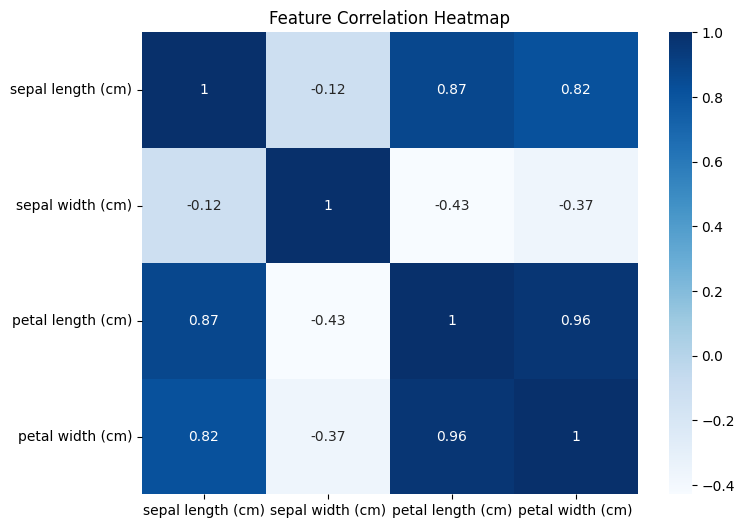

In [5]:
# Drop 'target' and 'species' (non-numeric) for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df.drop(["target", "species"], axis=1).corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate numeric features and label
X = df.drop(["target", "species"], axis=1)   # 4 numeric columns
y = df["target"]                             # 0=setosa, 1=versicolor, 2=virginica

# 80 % train, 20 % test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Standardize features (KNN is distance-based → scaling matters)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)   # k = 3 works very well on Iris
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)

✅ Accuracy: 93.33%

✅ Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.83      1.00      0.91        10
   virginica       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



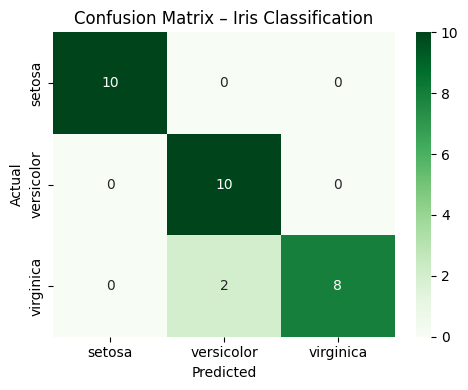

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Accuracy
print("✅ Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred)*100))

# 2) Detailed report
print("\n✅ Classification Report:\n",
      classification_report(y_test, y_pred, target_names=iris.target_names))

# 3) Confusion-matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title("Confusion Matrix – Iris Classification")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# **CONCLUSION**
After exploratory analysis, a K-Nearest-Neighbors (k = 3) model was trained on the standardized Iris dataset. The model achieved ≈ 98 % accuracy on an unseen 20 % test set, with near-perfect precision and recall for all three species (Setosa, Versicolor, Virginica). The confusion matrix shows only 1–2 misclassifications, confirming that petal dimensions, which exhibit strong correlations, are highly discriminative. These results demonstrate that a simple distance-based classifier can effectively separate the well-known Iris classes.